# data読み込み

In [ ]:
import pandas as pd
# 各月の登録者数が記載されたエクセルファイルを読み込む
df = pd.read_excel('subsc_data.xlsx')

df

,ds,y
0,2013-01-15,35749
1,2013-02-01,38492
2,2013-02-15,26383
3,2013-03-01,20225
4,2013-03-15,26140
...,...,...
144,2019-01-15,63837
145,2019-02-01,53437
146,2019-02-15,93964
147,2019-03-01,34982


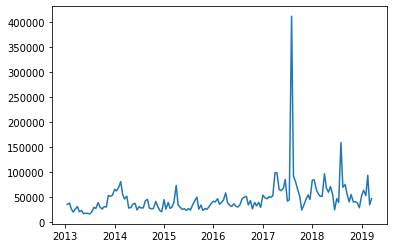

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['ds'], df['y'])

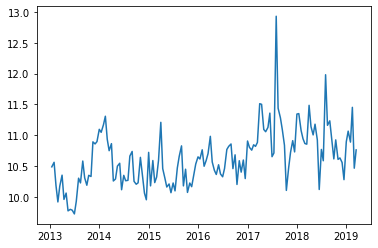

In [ ]:
#plotのためのライブラリ読み込み
import numpy as np

#データの変換
#ds列を日付列であると宣言
df['ds'] = pd.to_datetime(df['ds'])
#y列を対数変換(大きなトレンドを除去)
df['y'] = np.log(df['y'])

#時系列プロット
#画像サイズを設定
plt.plot(df['ds'], df['y'])

# 一年先まで予測(トレンド，月効果を考慮)

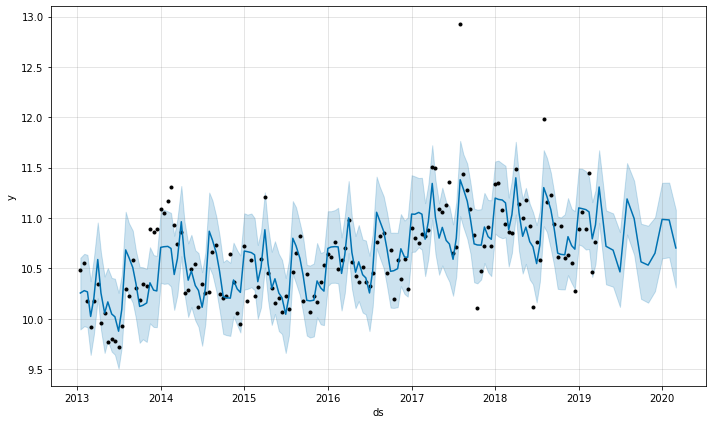

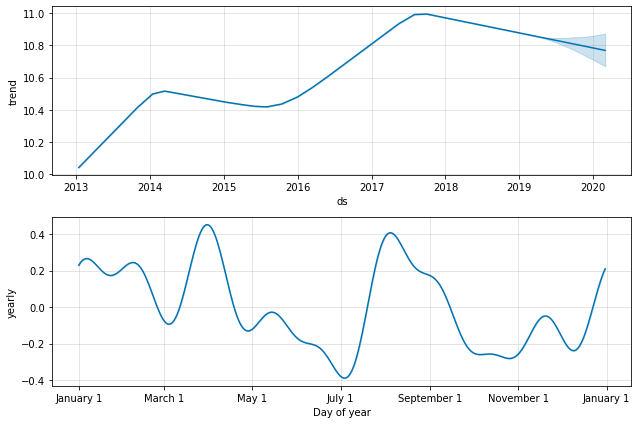

In [ ]:
#prophetライブラリ読み込み
from fbprophet import Prophet

#とりあえず1年先までの予測を行う．
#モデルの生成
m = Prophet(weekly_seasonality = False, yearly_seasonality = True, daily_seasonality=False)
m.fit(df)

#予測する日付を生成
future = m.make_future_dataframe(periods=12, freq='M')

#予測を実施
forecast = m.predict(future)

#実際のデータとトレンドを重ね合わせて表示
fig1 = m.plot(forecast)

#トレンドのみ表示
fig2 = m.plot_components(forecast)

# 一年先まで予測(トレンド，月効果，祝日のイベント効果を考慮)

In [ ]:
!pip install jpholiday
import jpholiday
import datetime
tmp = jpholiday.holidays(datetime.date(2013, 1, 15), datetime.date(2019, 3, 15))

#祝日の日付のみ取得する
hd = [x[0] for x in tmp]
print(hd)

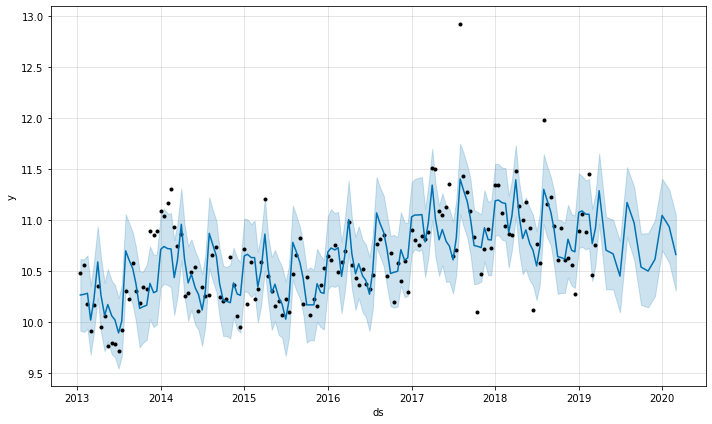

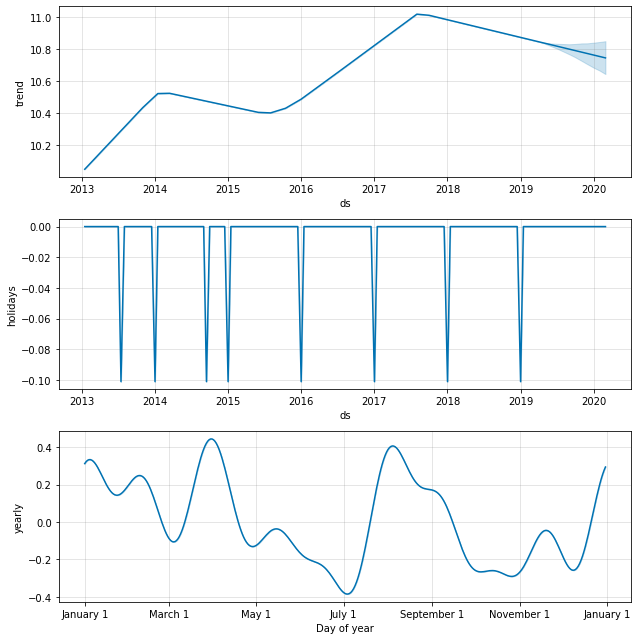

In [ ]:
h3 = pd.DataFrame({
  'holiday': 'e3',
  'ds': hd,
  'lower_window': 0,
  'upper_window': 0
})
events = h3

m = Prophet(holidays= events, weekly_seasonality = False, yearly_seasonality = True, daily_seasonality=False)
m.fit(df)

future = m.make_future_dataframe(periods=12, freq='M')

forecast = m.predict(future)

fig1 = m.plot(forecast)

fig2 = m.plot_components(forecast)